In [1]:
%pylab inline
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

from hamsci import rbn_lib
import datetime

def to_cmap(my_cdict,name='CustomCMAP',vmin=0.,vmax=30.):
    norm = matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
    
    red   = []
    green = []
    blue  = []
    
    keys = my_cdict.keys()
    keys.sort()
    
    for x in keys:
        r,g,b, = my_cdict[x]
        x = norm(x)
        r = r/255.
        g = g/255.
        b = b/255.
        red.append(   (x, r, r))
        green.append( (x, g, g))
        blue.append(  (x, b, b))
    cdict = {'red'   : tuple(red),
             'green' : tuple(green),
             'blue'  : tuple(blue)}
    cmap  = LinearSegmentedColormap(name, cdict)
    return cmap

cc = matplotlib.colors.ColorConverter().to_rgb
def cc255(color):
    trip = np.array(cc(color))*255
    trip = [int(x) for x in trip]
    return tuple(trip)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
sTime = datetime.datetime(2014,11,1,23)
eTime = datetime.datetime(2014,11,2,1)
rbn_obj  = rbn_lib.RbnObject(sTime,eTime)

Starting RBN processing on <20141101.zip> at 2016-06-18 21:43:15.741416.


In [10]:
cc255('0.8')

(204, 204, 204)

In [37]:
vmin, vmax = 0.,180.

fc = {}
fc[vmin] = cc255('white')
fc[75]   = cc255('white')
fc[90]   = cc255('0.4')
fc[vmax] = cc255('0.2')

cmap = to_cmap(fc,vmin=vmin,vmax=vmax)

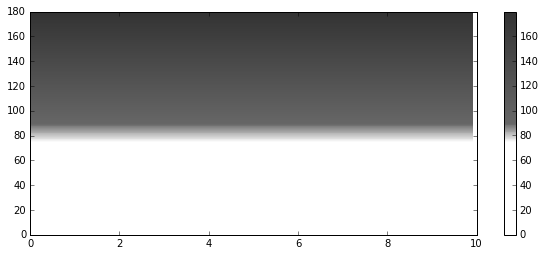

In [38]:
x = np.arange(0, 10, 0.1)
y = np.arange(0, 180, 0.1)
X, Y = np.meshgrid(x, y)
Z = Y

# Make the figure:
plt.figure(figsize=(10, 4))
plt.subplot(111)
plt.pcolormesh(X,Y,Z,cmap=cmap)
plt.colorbar()
plt.show()

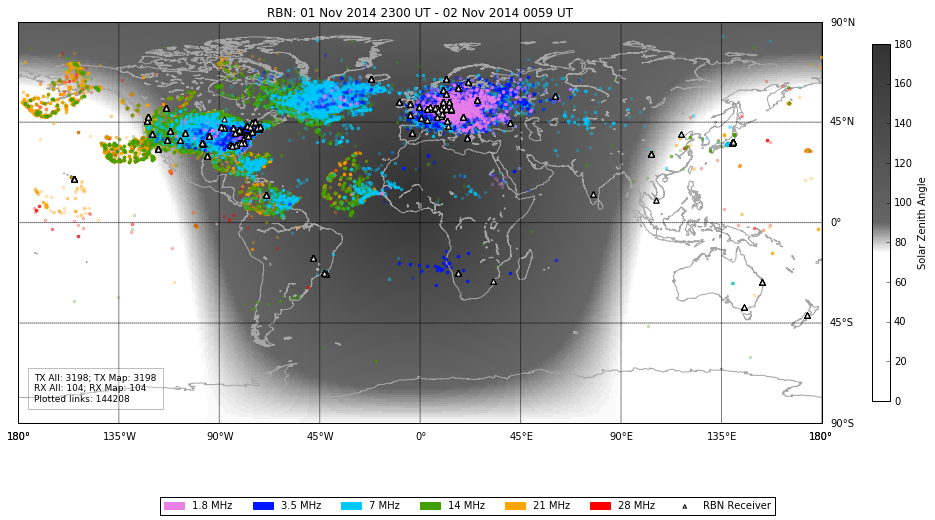

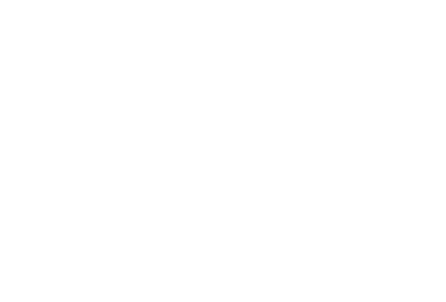

In [42]:
fig = plt.figure(figsize=(18,8))
ax  = fig.add_subplot(111)
szd = {}
szd['cmap'] = cmap
szd['vmin'] = vmin
szd['vmax'] = vmax

rbn_map = rbn_lib.RbnMap(rbn_obj,ax=ax,
                        nightshade=False,solar_zenith=True,
                        solar_zenith_dict=szd)